In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
plt.rcParams['figure.figsize']=(15,9)

In [8]:
df_case = pd.read_csv("owid-covid-data.csv")
df_economy = pd.read_csv("DP_LIVE_28072020174504157.csv")

In [9]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33207 entries, 0 to 33206
Data columns (total 34 columns):
iso_code                           33143 non-null object
continent                          32932 non-null object
location                           33207 non-null object
date                               33207 non-null object
total_cases                        32852 non-null float64
new_cases                          32852 non-null float64
total_deaths                       32852 non-null float64
new_deaths                         32852 non-null float64
total_cases_per_million            32788 non-null float64
new_cases_per_million              32788 non-null float64
total_deaths_per_million           32788 non-null float64
new_deaths_per_million             32788 non-null float64
new_tests                          10401 non-null float64
total_tests                        10647 non-null float64
total_tests_per_thousand           10647 non-null float64
new_tests_per_thousand   

In [73]:
grouped_location = df_case['total_cases'].groupby(df_case['location']).sum().sort_values(ascending=False)
grouped_date = df_case['total_cases'].groupby(df_case['date']).sum().sort_values(ascending=False)
new_cases_location = df_case['new_cases'].groupby(df_case['location']).sum().sort_values(ascending=False)
new_cases_date = df_case['new_cases'].groupby(df_case['date']).sum().sort_values(ascending=False)
total_deaths_location = df_case['total_deaths'].groupby(df_case['location']).sum().sort_values(ascending=False)
total_deaths_date = df_case['total_deaths'].groupby(df_case['date']).sum().sort_values(ascending=False)
new_deaths_location = df_case['new_deaths'].groupby(df_case['location']).sum().sort_values(ascending=False)
new_deaths_date = df_case['new_deaths'].groupby(df_case['date']).sum().sort_values(ascending=False)

In [74]:
grouped_location.isnull().value_counts()
cleaned_grouped_location = grouped_location.dropna()

In [75]:
cleaned_grouped_location.isnull().value_counts()

False    211
Name: total_cases, dtype: int64

In [76]:
grouped_date.isnull().value_counts()

False    211
Name: total_cases, dtype: int64

In [77]:
new_cases_location.isnull().value_counts()
cleaned_new_cases_location = grouped_location.dropna()
cleaned_new_cases_location.isnull().value_counts()

False    211
Name: total_cases, dtype: int64

In [78]:
new_cases_date.isnull().value_counts()

False    211
Name: new_cases, dtype: int64

In [79]:
total_deaths_location.isnull().value_counts()
cleaned_total_deaths_location = total_deaths_location.dropna()

In [80]:
total_deaths_date.isnull().value_counts()

False    211
Name: total_deaths, dtype: int64

In [81]:
new_deaths_location.isnull().value_counts()
cleaned_new_deaths_location = new_deaths_location.dropna()

In [82]:
new_deaths_date.isnull().value_counts()

False    211
Name: new_deaths, dtype: int64

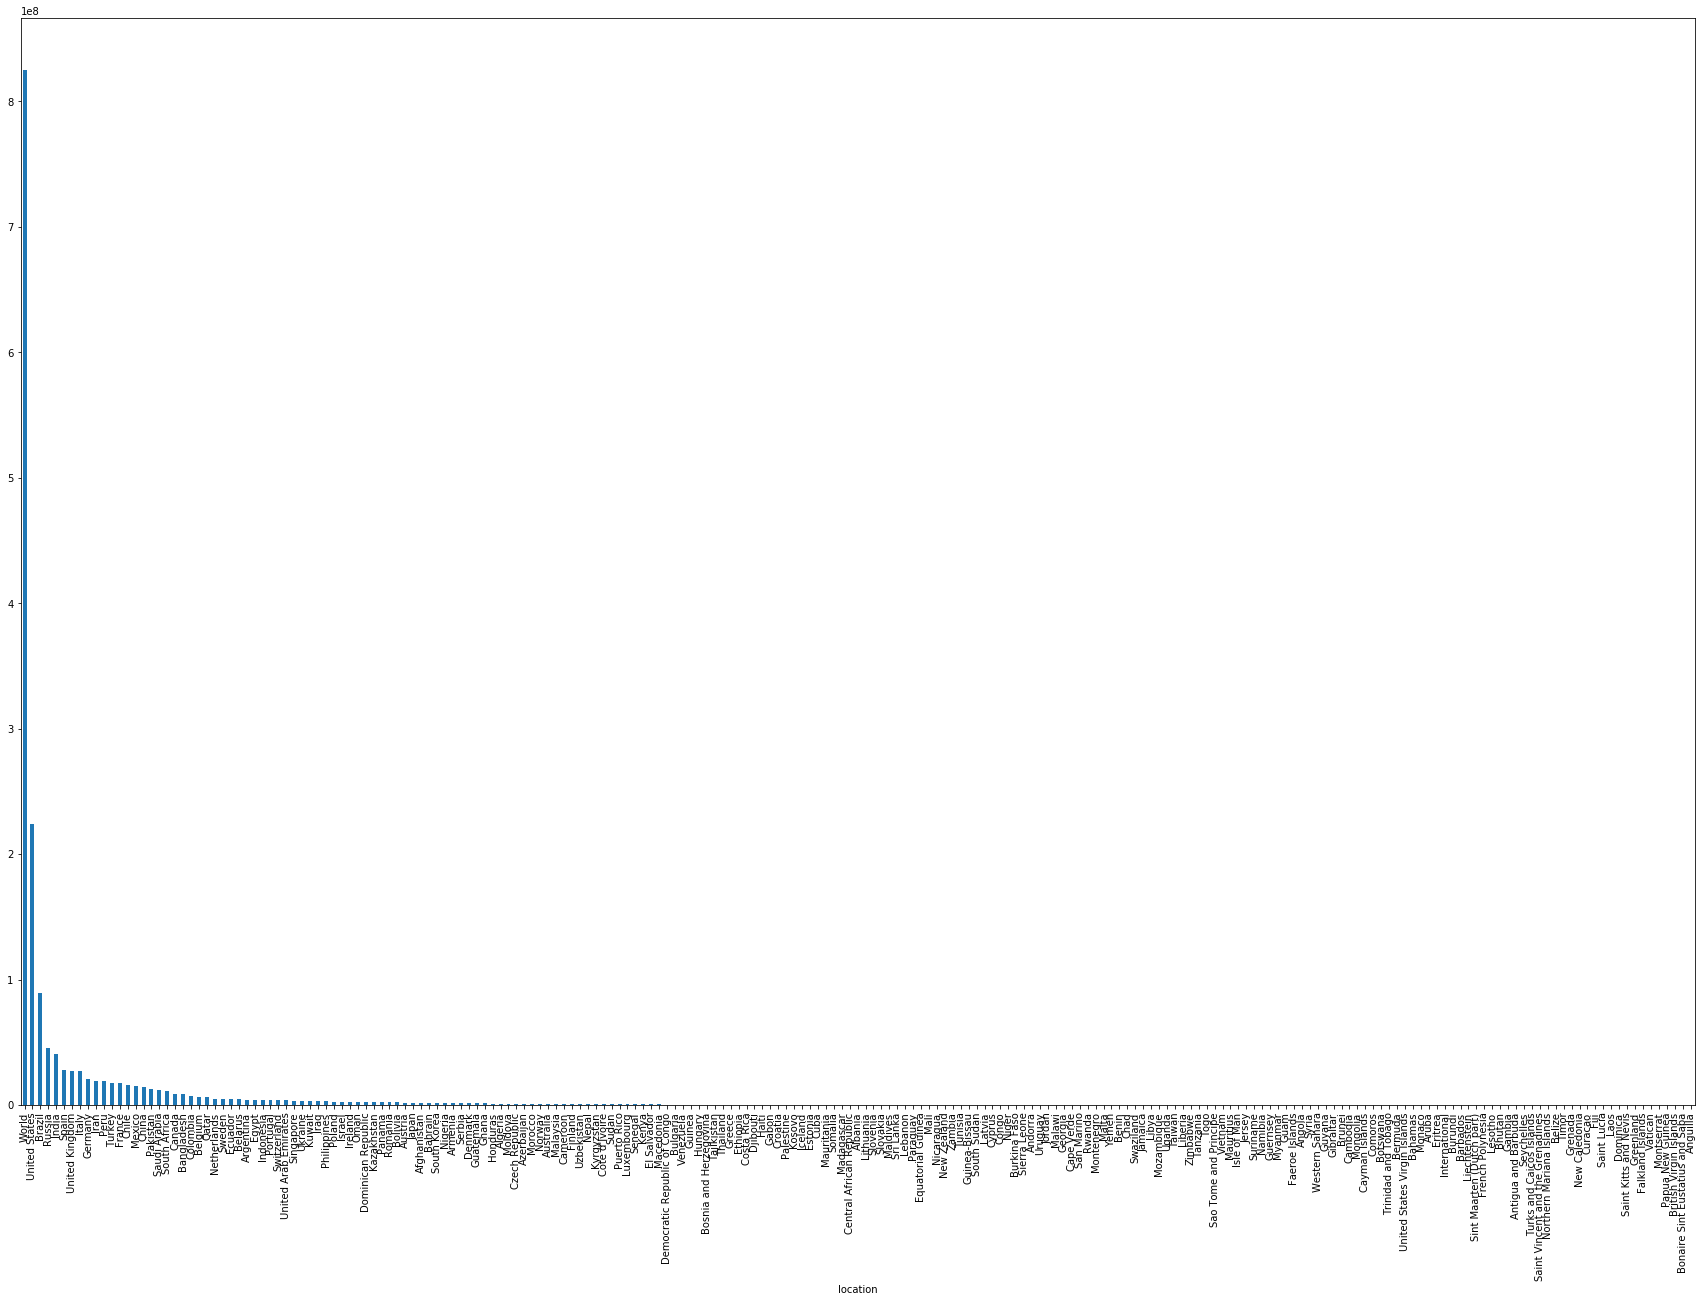

In [61]:
cleaned_grouped_location.plot(kind='bar', figsize=(30, 20))

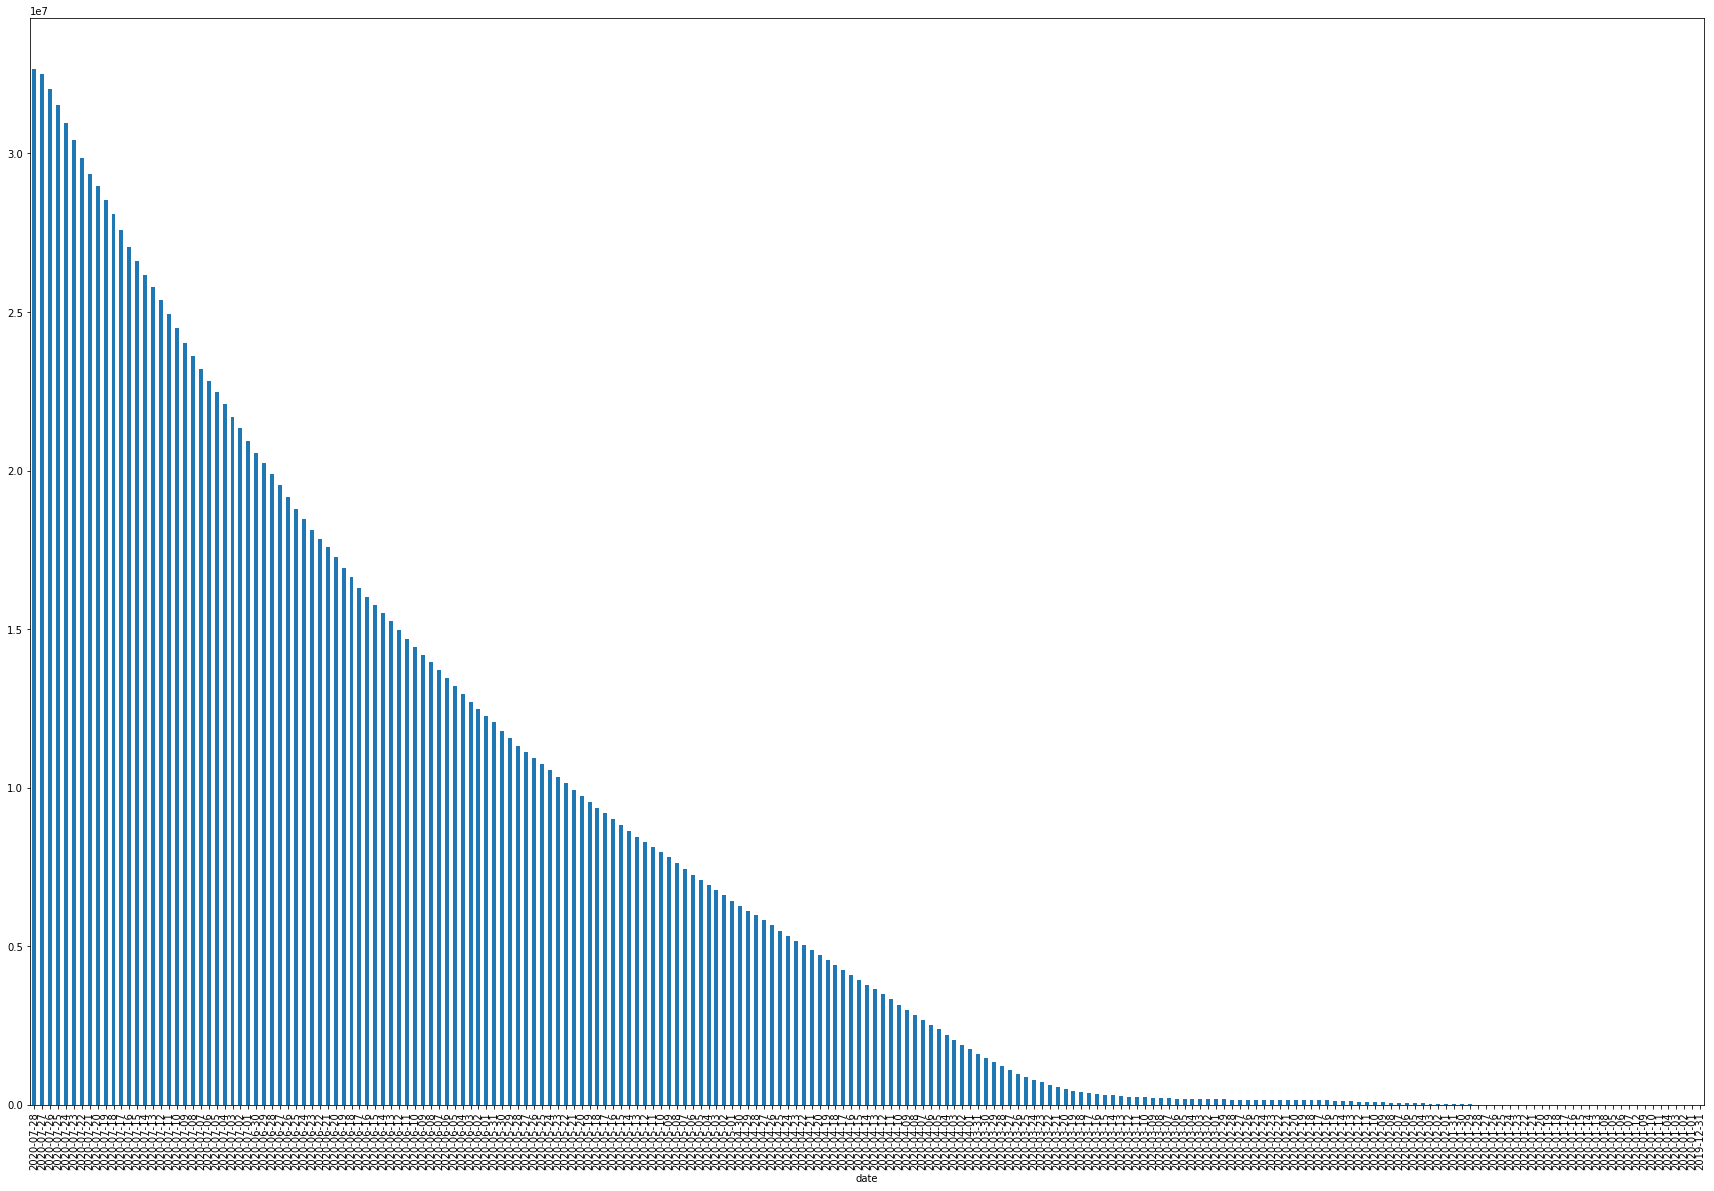

In [62]:
grouped_date.plot(kind='bar', figsize=(30, 20))

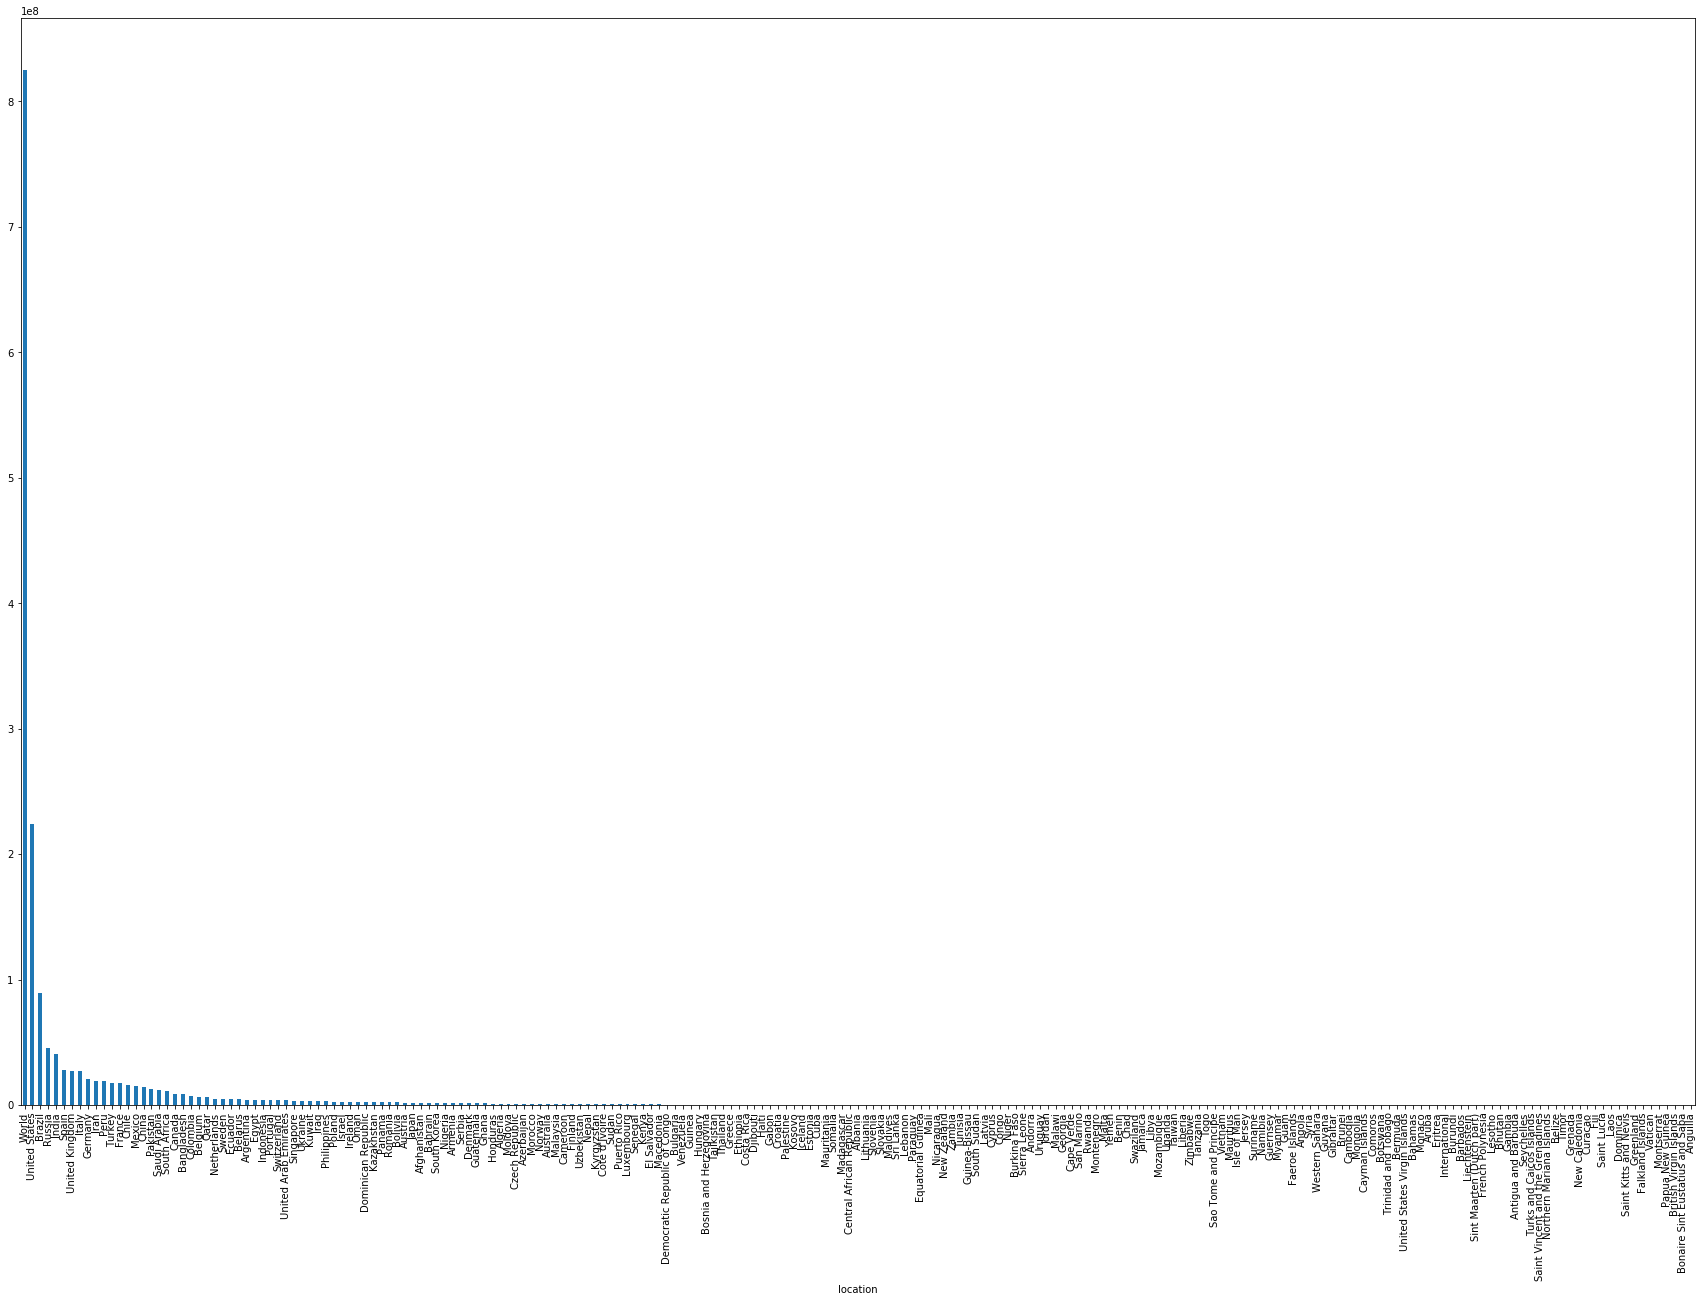

In [63]:
cleaned_new_cases_location.plot(kind='bar', figsize=(30, 20))

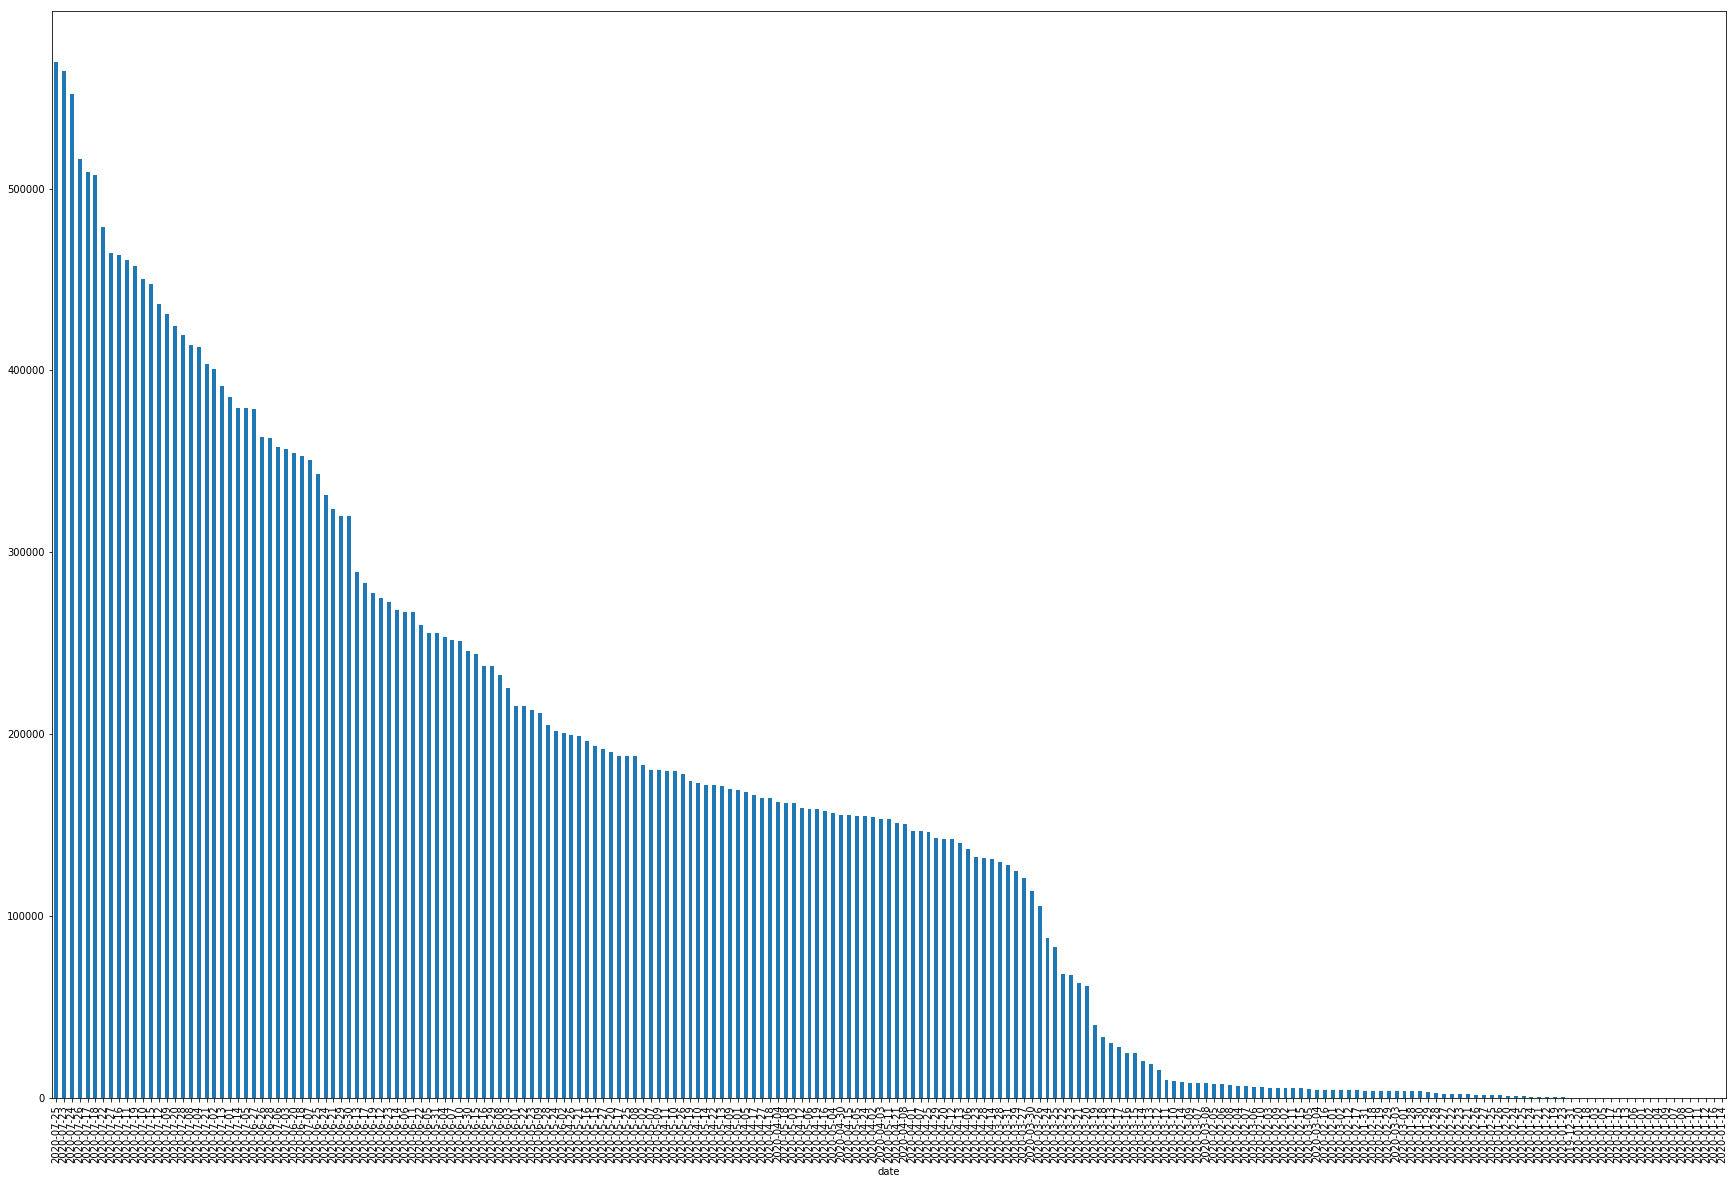

In [65]:
new_cases_date.plot(kind='bar', figsize=(30, 20))

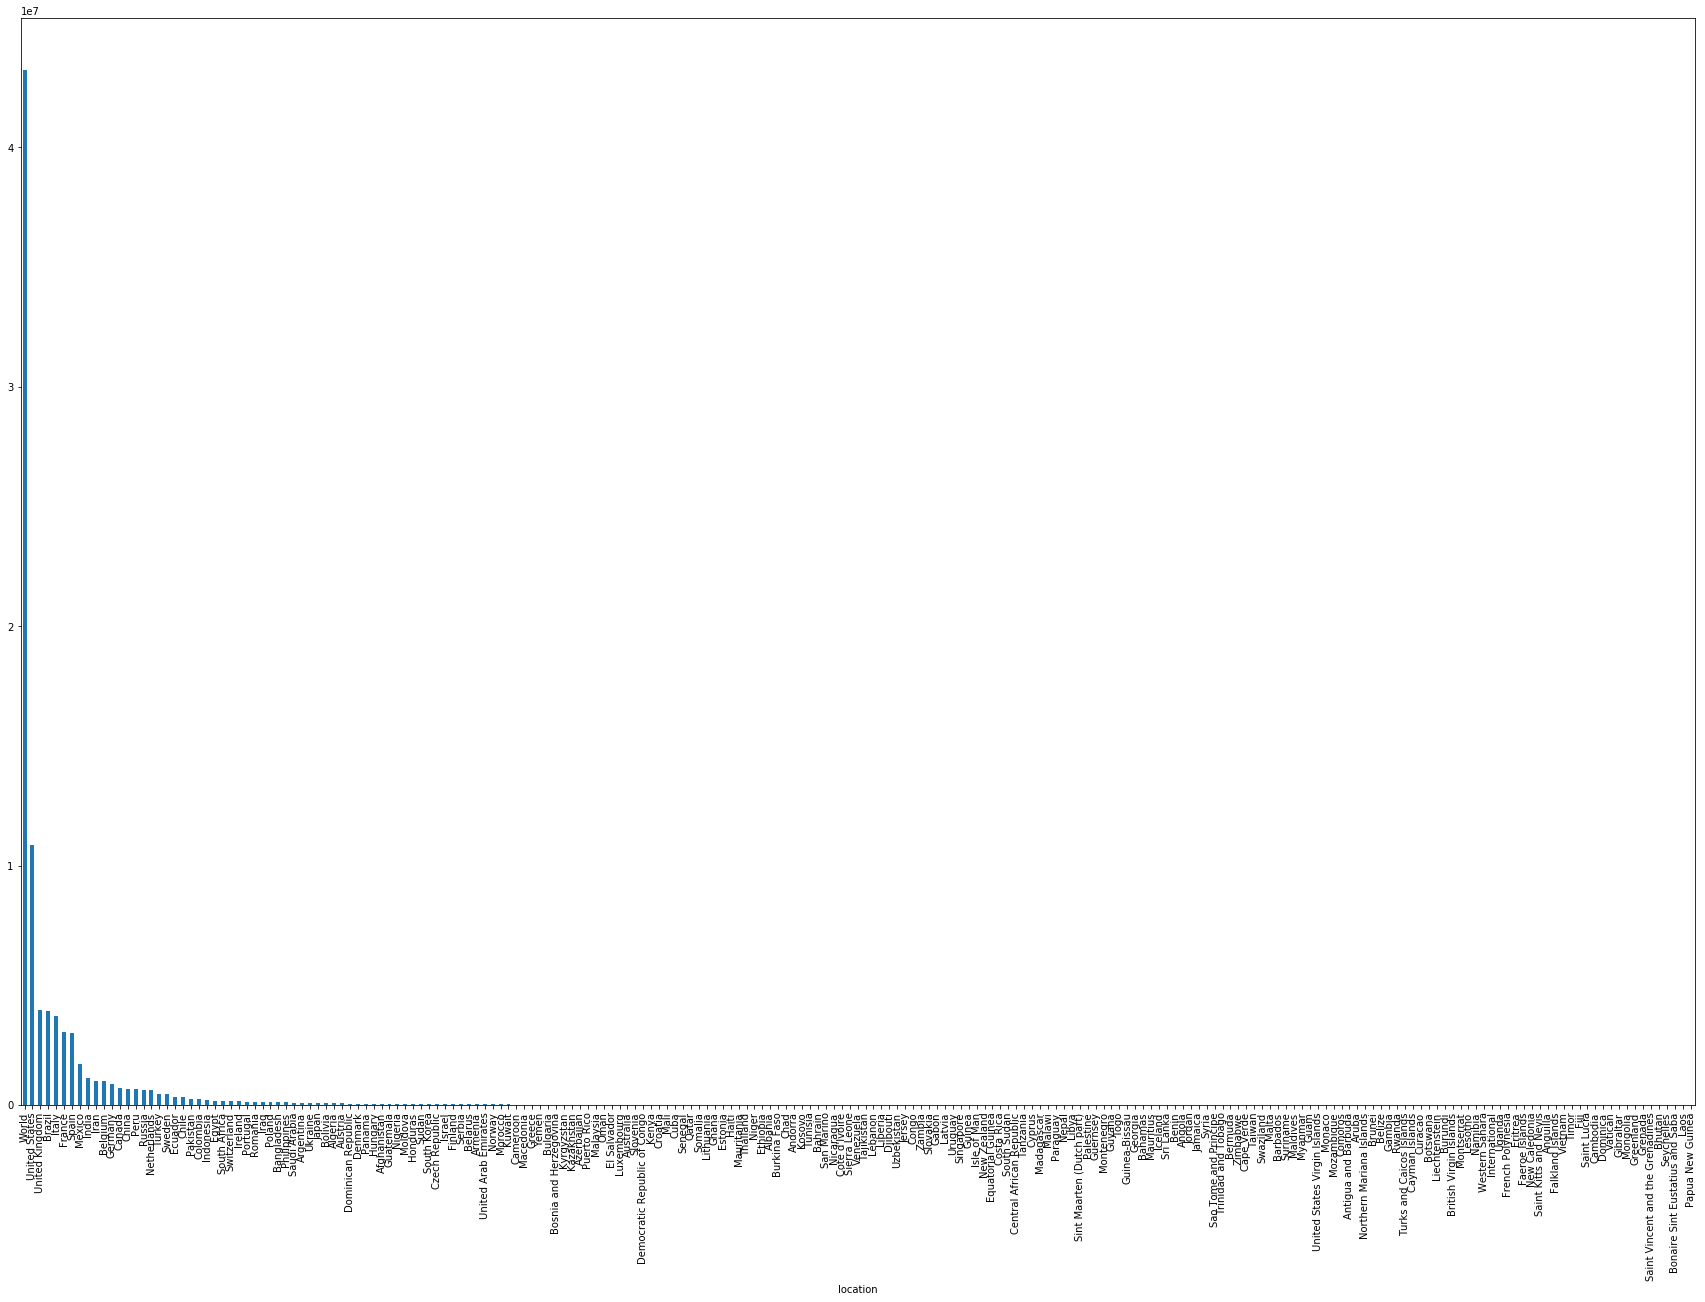

In [83]:
cleaned_total_deaths_location.plot(kind='bar', figsize=(30, 20))

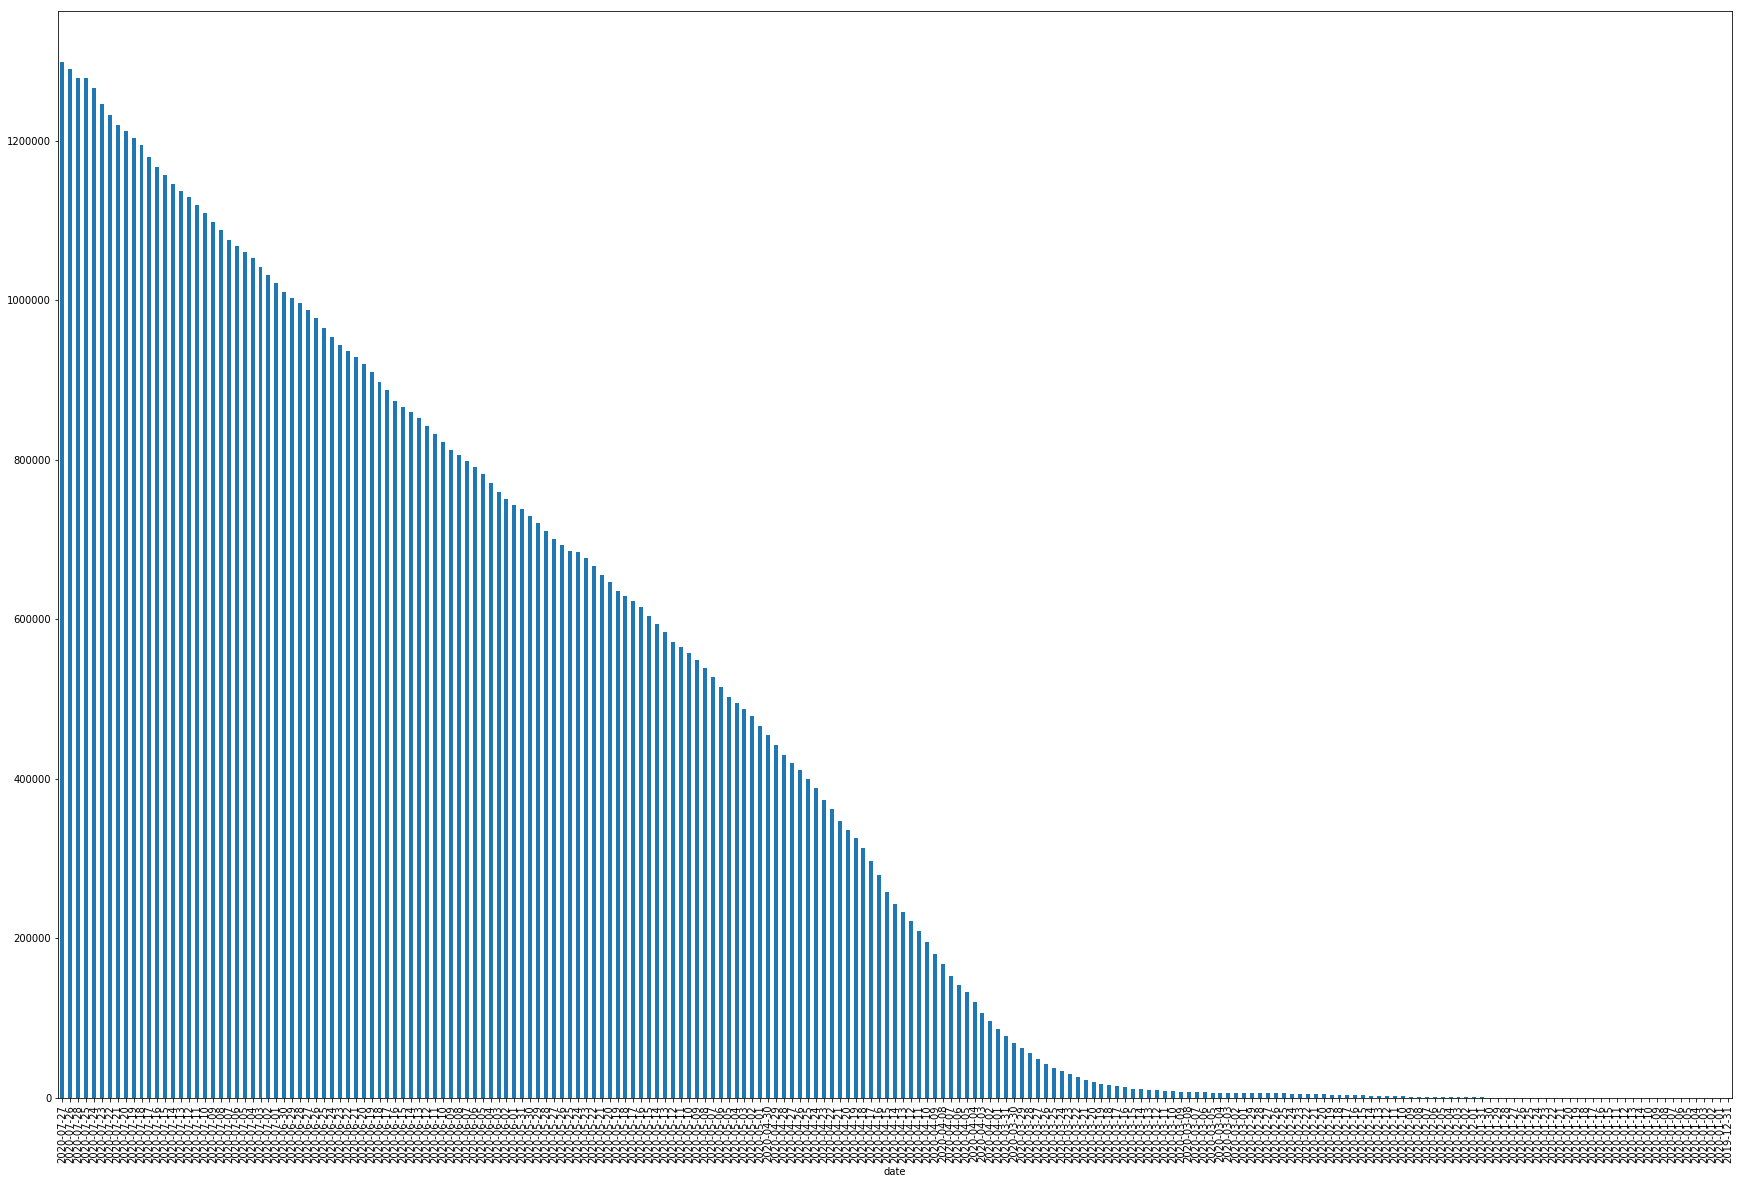

In [84]:
total_deaths_date.plot(kind='bar', figsize=(30, 20))

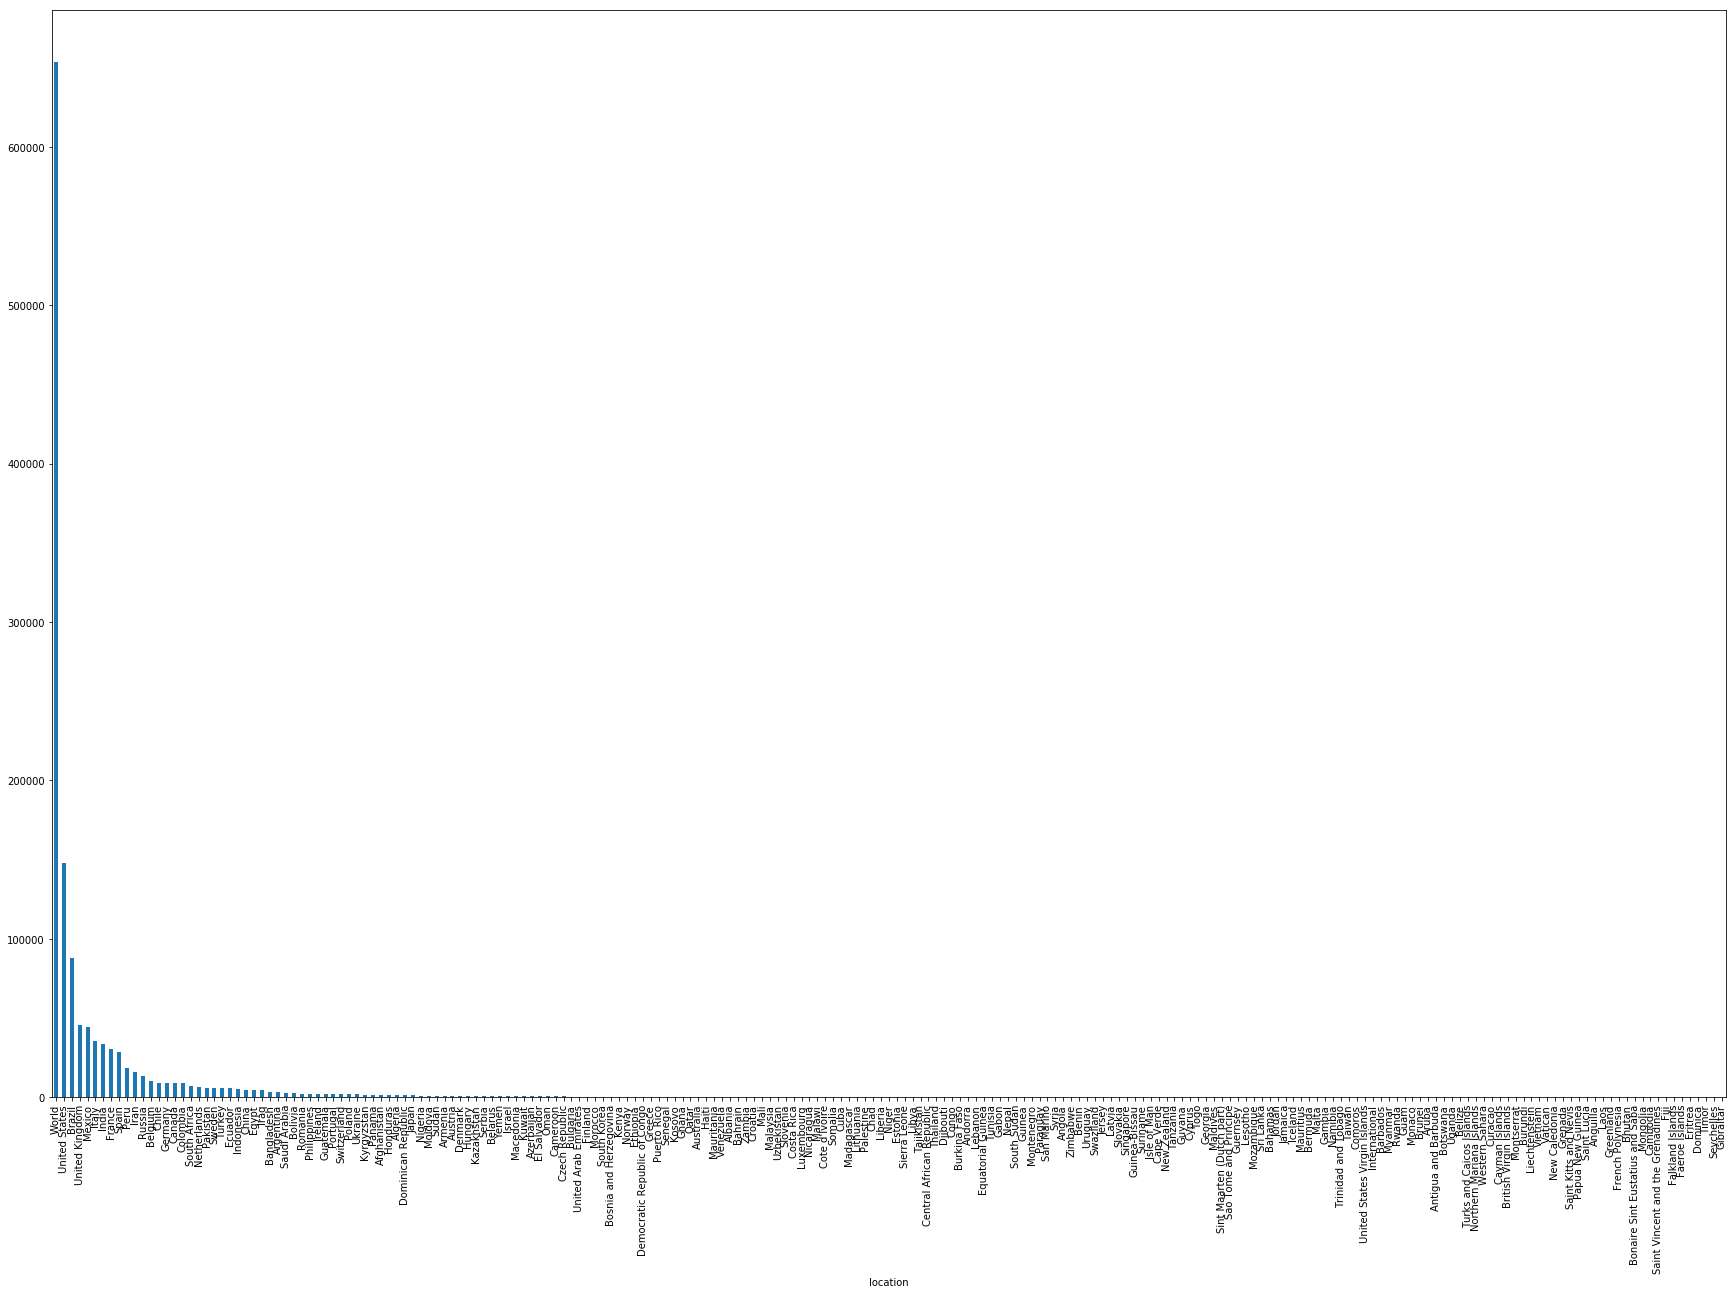

In [85]:
cleaned_new_deaths_location.plot(kind='bar', figsize=(30, 20))

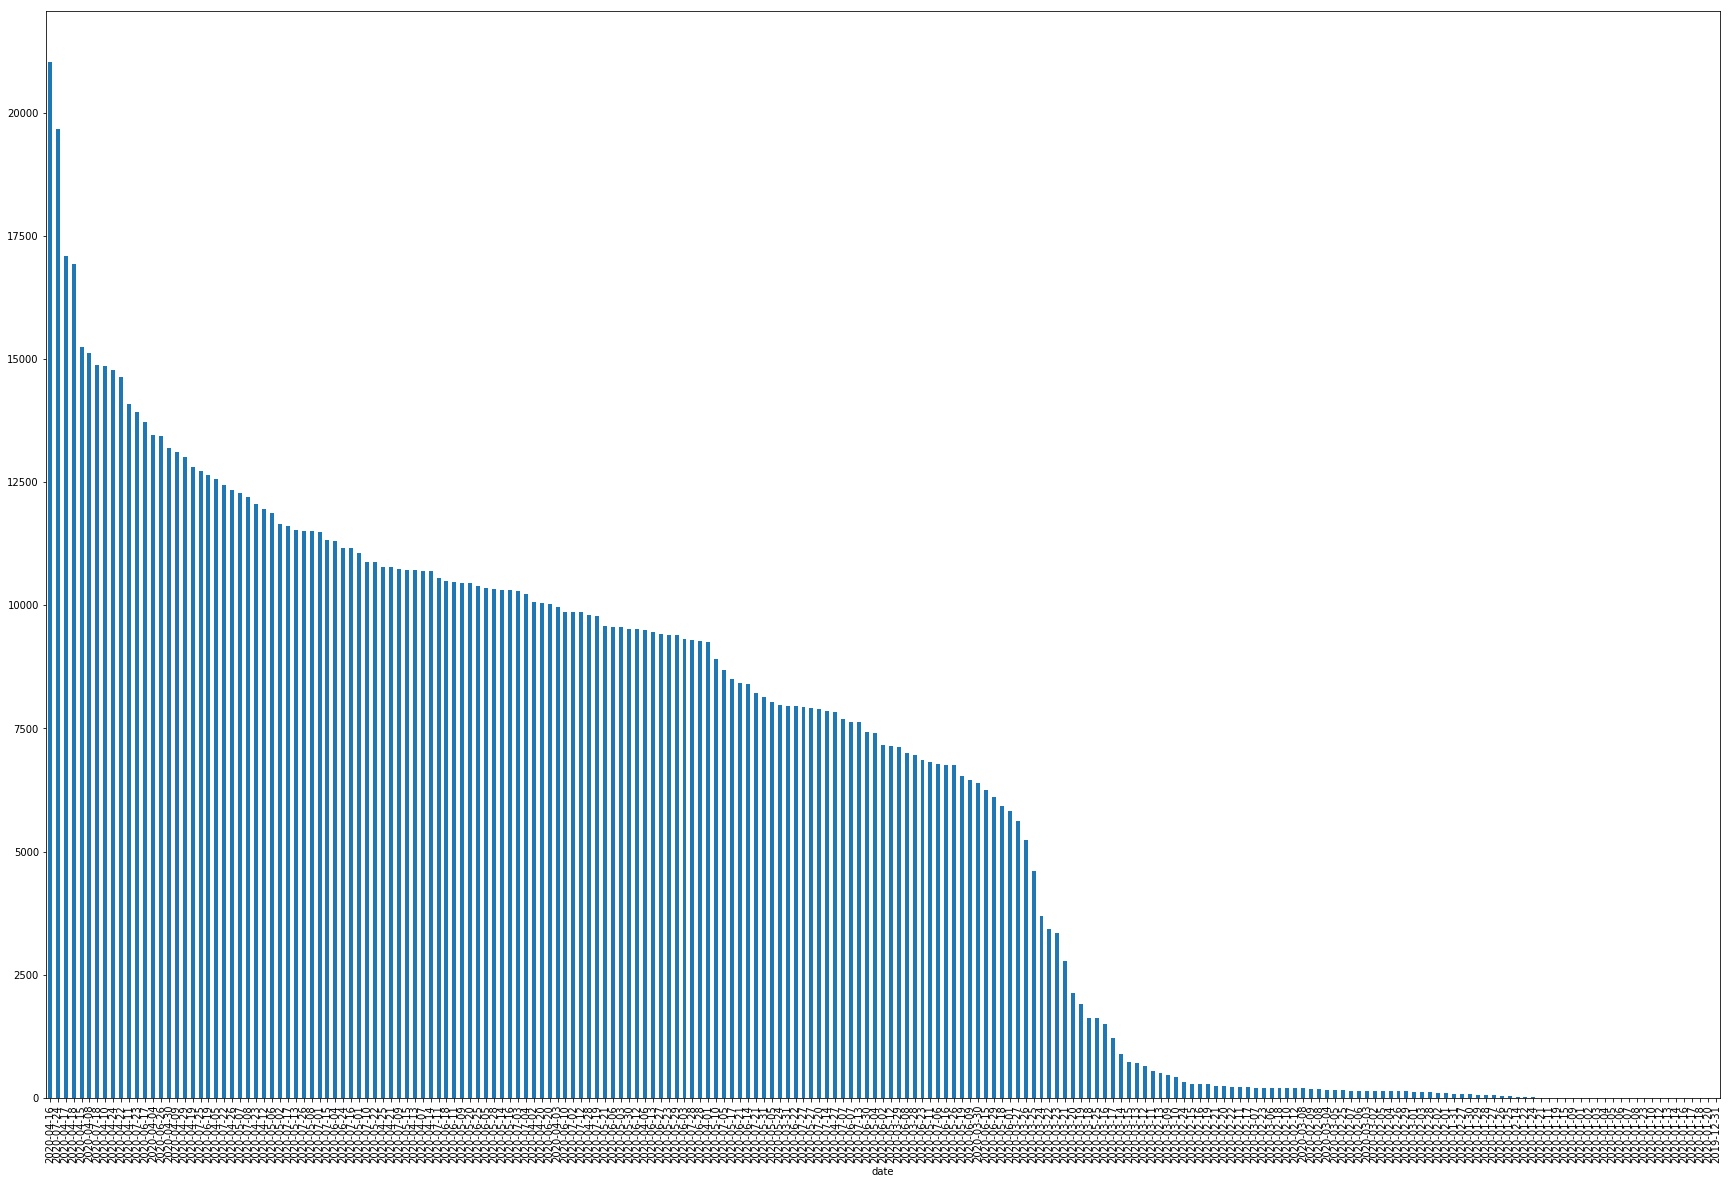

In [87]:
new_deaths_date.plot(kind='bar', figsize=(30, 20))

                total_cases  aged_65_older  aged_70_older  female_smokers
total_cases        1.000000       0.018757       0.016828       -0.004011
aged_65_older      0.018757       1.000000       0.994238        0.776375
aged_70_older      0.016828       0.994238       1.000000        0.780808
female_smokers    -0.004011       0.776375       0.780808        1.000000


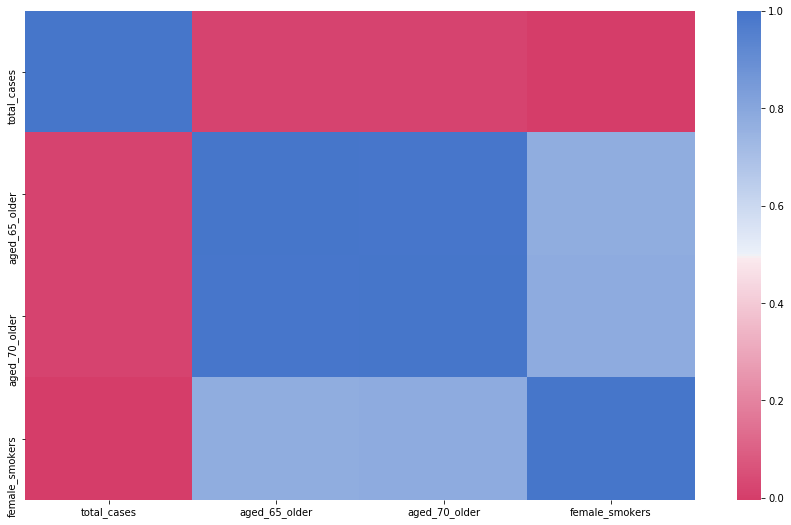

In [111]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations_cases = df_case[['total_cases','aged_65_older','aged_70_older','female_smokers']].corr()
print(correlations_cases)
sns.heatmap(correlations_cases, cmap=cmap)

               total_cases  aged_65_older  aged_70_older  male_smokers
total_cases       1.000000       0.018757       0.016828     -0.006131
aged_65_older     0.018757       1.000000       0.994238      0.077061
aged_70_older     0.016828       0.994238       1.000000      0.078594
male_smokers     -0.006131       0.077061       0.078594      1.000000


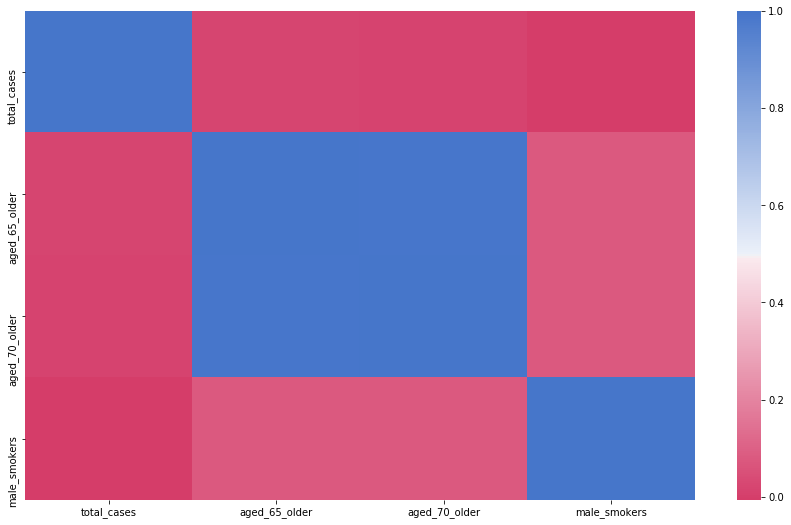

In [112]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations_cases = df_case[['total_cases','aged_65_older','aged_70_older','male_smokers']].corr()
print(correlations_cases)
sns.heatmap(correlations_cases, cmap=cmap)

                total_deaths  aged_65_older  aged_70_older  female_smokers
total_deaths        1.000000       0.041257       0.040620        0.011060
aged_65_older       0.041257       1.000000       0.994238        0.776375
aged_70_older       0.040620       0.994238       1.000000        0.780808
female_smokers      0.011060       0.776375       0.780808        1.000000


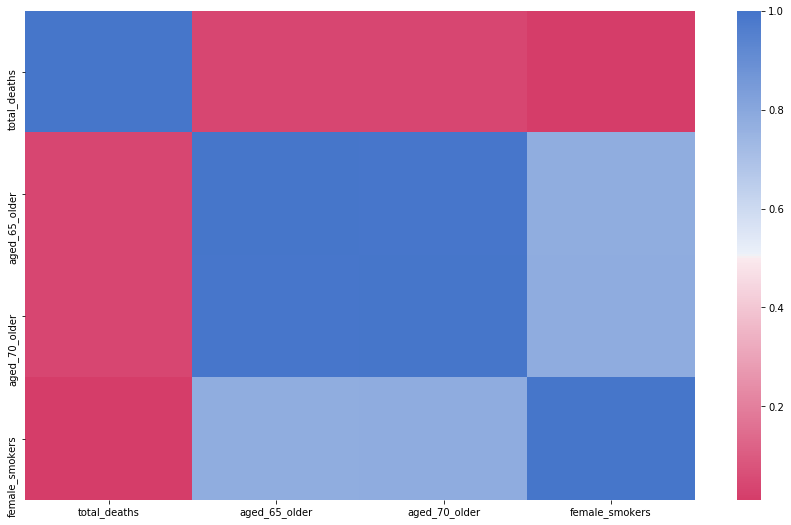

In [113]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations_cases = df_case[['total_deaths','aged_65_older','aged_70_older','female_smokers']].corr()
print(correlations_cases)
sns.heatmap(correlations_cases, cmap=cmap)

               total_deaths  aged_65_older  aged_70_older  male_smokers
total_deaths       1.000000       0.041257       0.040620     -0.014323
aged_65_older      0.041257       1.000000       0.994238      0.077061
aged_70_older      0.040620       0.994238       1.000000      0.078594
male_smokers      -0.014323       0.077061       0.078594      1.000000


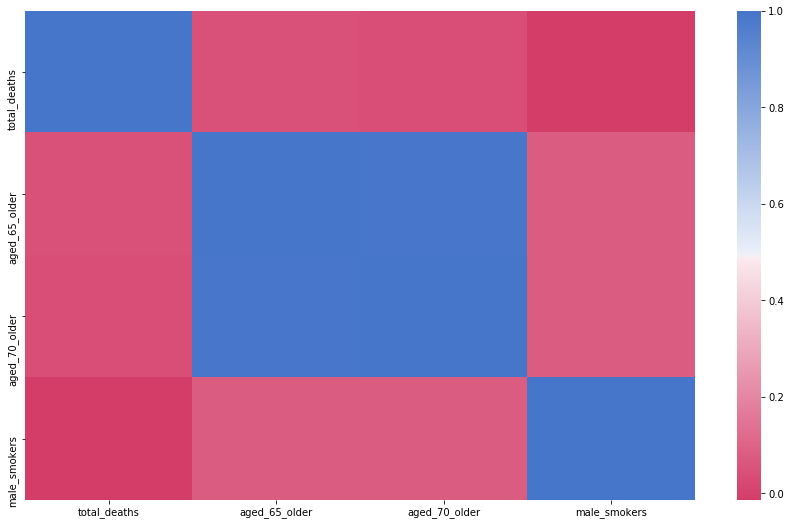

In [114]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations_cases = df_case[['total_deaths','aged_65_older','aged_70_older','male_smokers']].corr()
print(correlations_cases)
sns.heatmap(correlations_cases, cmap=cmap)

The COVID-19, as the latest pandemic exploded suddenly and has affect almost the whole world, it is important to understand how serious it is and how it might affect us. Therefore, I analyze this data to investigate more. According to the analysis above, it is clearly to see now the situation in the Unites States is the most severe one, whatever deaths cases(total or new) or total cases or new cases is the highest among all the countries can show how seriousness in the U.S. 

As both total cases and deaths cases are keeping going up, the newer the date is, the higher the cases are. But in July 16th, it has the highest new deaths cases.

For gender and age, it is easy to see female smokers, either older than 65 or 70, are more vulnerable to COVID 19 compare to male smokers. 

In [94]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52802 entries, 0 to 52801
Data columns (total 8 columns):
LOCATION      52802 non-null object
INDICATOR     52802 non-null object
SUBJECT       52802 non-null object
MEASURE       52802 non-null object
FREQUENCY     52802 non-null object
TIME          52802 non-null object
Value         52802 non-null float64
Flag Codes    1095 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ MB


In [109]:
df_economy.isnull().sum()

LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    51707
dtype: int64

In [96]:
grouped_location = df_economy['Value'].groupby(df_economy['LOCATION']).sum().sort_values(ascending=False)

In [98]:
grouped_time = df_economy['Value'].groupby(df_economy['TIME']).sum().sort_values(ascending=False)

In [108]:
grouped_time

TIME
2019-Q4    4.607895e+06
2019-Q3    4.584869e+06
2019       4.583532e+06
2019-Q2    4.573799e+06
2019-Q1    4.567029e+06
2018-Q4    4.555491e+06
2018-Q3    4.545860e+06
2018       4.539244e+06
2018-Q2    4.534817e+06
2018-Q1    4.520880e+06
2017-Q4    4.498356e+06
2017-Q3    4.487664e+06
2017       4.476247e+06
2008       4.470911e+06
2017-Q2    4.469176e+06
2008-Q3    4.466530e+06
2008-Q1    4.465545e+06
2017-Q1    4.449687e+06
2016-Q4    4.436423e+06
2016-Q3    4.424231e+06
2016       4.416349e+06
2009-Q1    4.412405e+06
2016-Q2    4.408086e+06
2010-Q3    4.404656e+06
2009       4.399280e+06
2010       4.396798e+06
2016-Q1    4.396793e+06
2010-Q1    4.382709e+06
2015-Q3    4.378845e+06
2015-Q4    4.376029e+06
               ...     
1958-03    2.227290e+05
1958-Q2    2.227152e+05
1956-11    2.226402e+05
1956-Q3    2.226364e+05
1958-07    2.225309e+05
1956-07    2.223562e+05
1956-05    2.221996e+05
1956-Q2    2.221855e+05
1958-04    2.218527e+05
1956-01    2.216987e+05
1956-04    

In [100]:
grouped_gender = df_economy['Value'].groupby(df_economy['SUBJECT']).sum().sort_values(ascending=False)

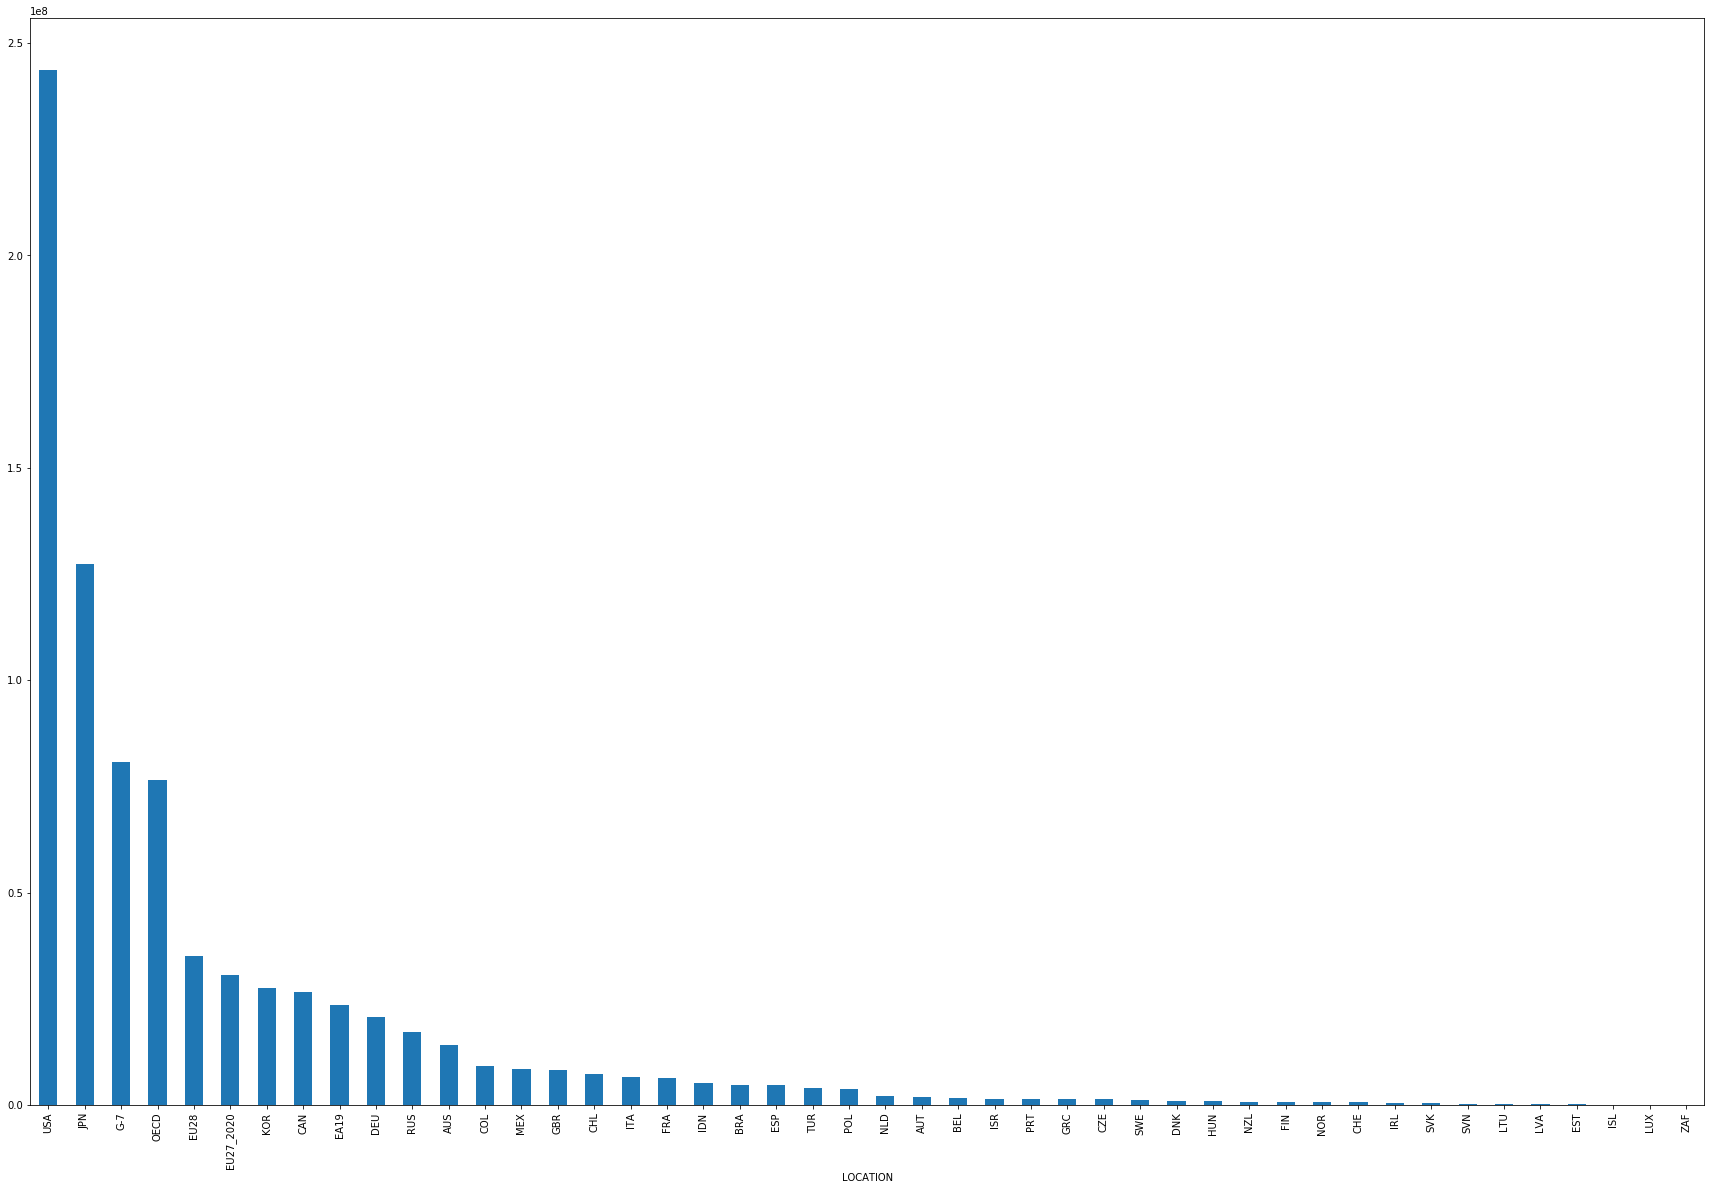

In [102]:
grouped_location.plot(kind='bar', figsize=(30, 20))

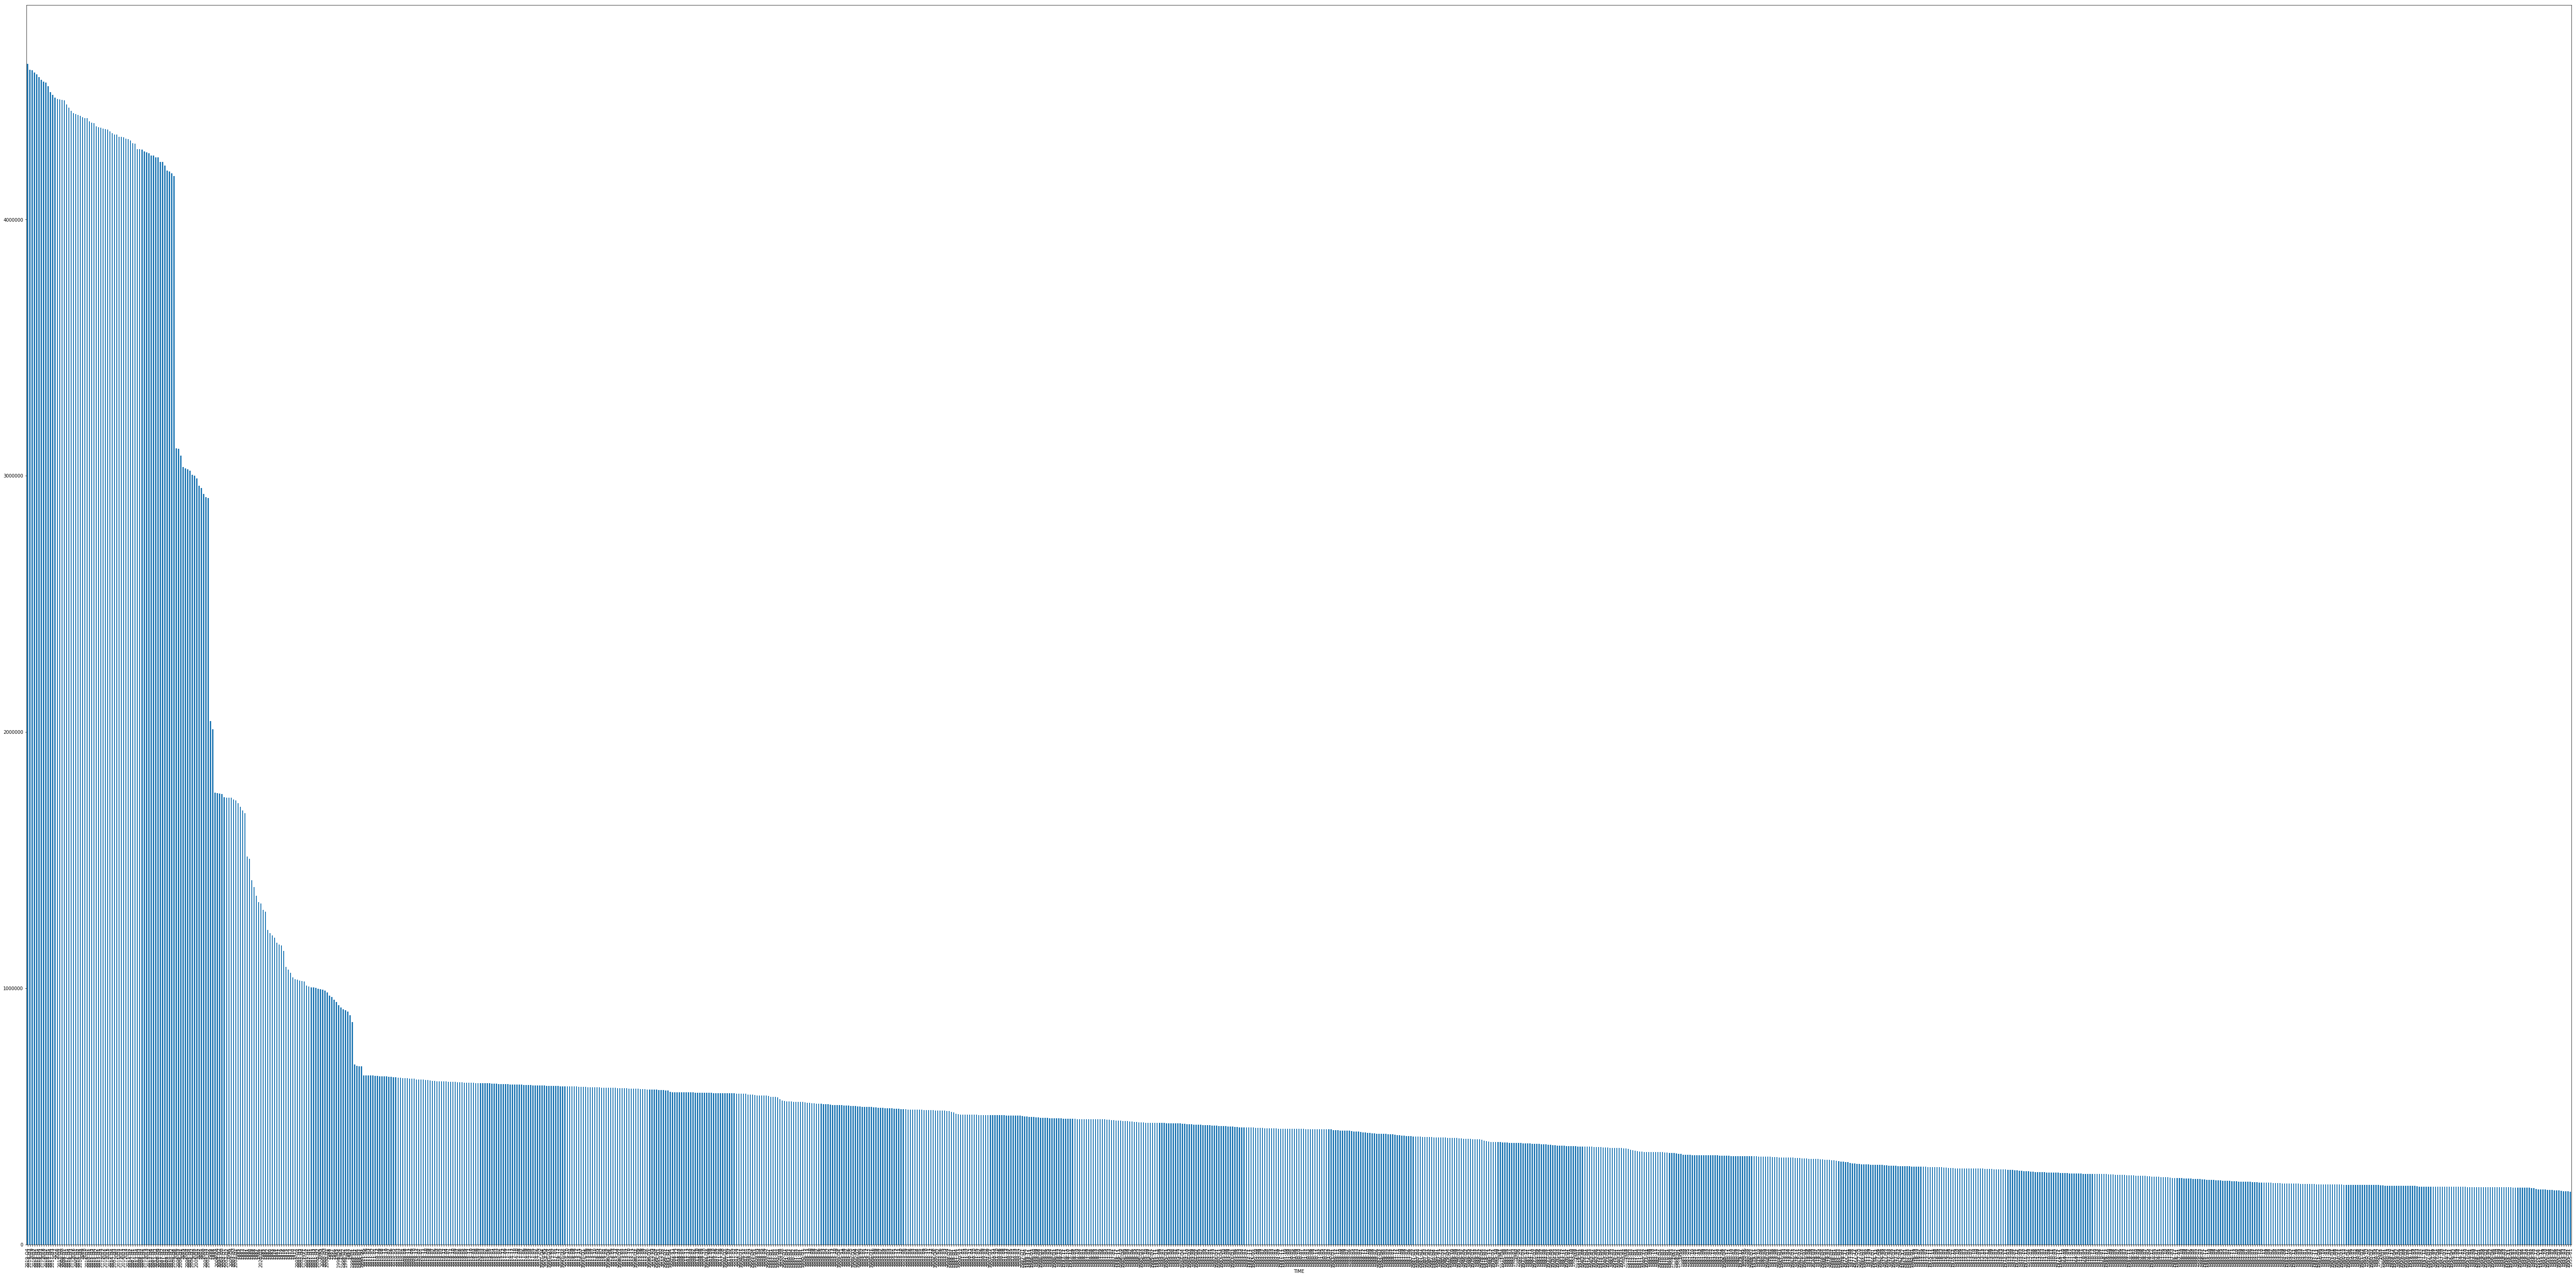

In [107]:
grouped_time.plot(kind='bar', figsize=(100, 50))

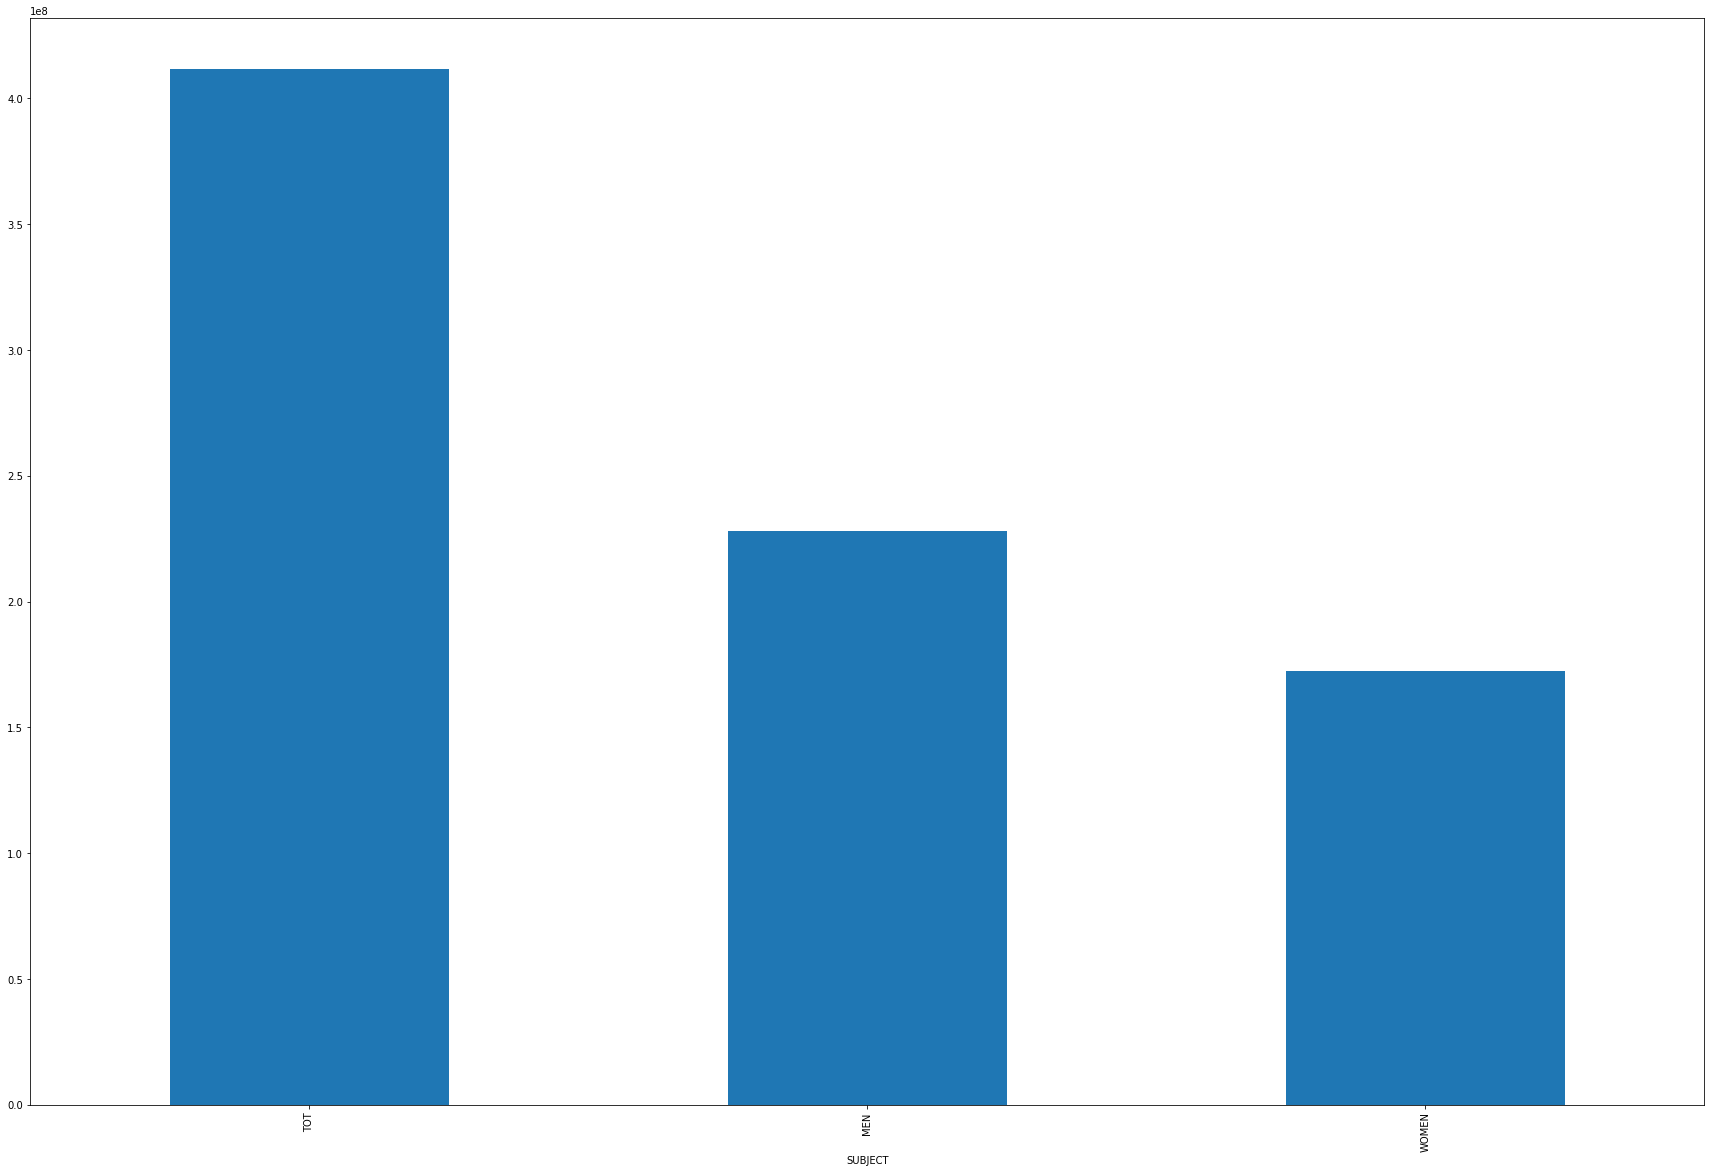

In [104]:
grouped_gender.plot(kind='bar', figsize=(30, 20))

As COVID 19 is continuing, it leaves a big impact on global economy, it is essential to know how the ecomony did before COVID 19. Employment rate is an important index. As we can see, before the COVID 19 came, the global economy was booming, especially in the U.S., the prosper economy brought a high employment, which continued until the end of 2019, then was Japan and Europe countries. Also, male is more employed than female.

Conclusion: The explosion of COVID 19 brings an expected but big and deep on our daily life and global economy. Therefore, personally I am interested in analyze this more detailedly - how COVID 19 is going and how it is and will effect our daily life and economy, which may include education, employment, stock, real estate and so on. As I could not find more data so far, this is just a warmup. Researhing COVID 19 will be a big but very critical topic. 